In [7]:
library(tm)
docs <- read.csv("D:\\TEXTproject\\datafiles\\part100.csv", header = FALSE)
#Making it in a corpus.
docs <- VectorSource(docs)
docs <- VCorpus(docs)

In [13]:
docs <- tm_map(docs,removePunctuation)   
docs <- tm_map(docs, removeNumbers)   
docs <- tm_map(docs, tolower) 
docs <- tm_map(docs, removeWords, stopwords("english"))  
#add custom stopwords in the below vector
docs <- tm_map(docs, removeWords, c())   
docs <- tm_map(docs, stripWhitespace)
docs <- tm_map(docs, PlainTextDocument)
#use when playing,plays,played to single word play 
docs <- tm_map(docs, stemDocument)

In [14]:
tdm <- TermDocumentMatrix(docs,
                          control = list(removePunctuation = TRUE,
                                         removeNumbers = TRUE,
                                         stopwords = TRUE))

In [15]:
tdm <- as.matrix(tdm)
 # change it to a Boolean matrix
 tdm[tdm>=1] <- 1
 # transform into a term-term adjacency matrix
 termMatrix <- tdm %*% t(tdm)
 # inspect terms numbered 5 to 10
 termMatrix[1:100,1:15]

,academ,achiev,adject,alreadi,also,anyth,area,base,behind,bend,best,bloat,bolder,border,brief
academ,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
achiev,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
adject,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
alreadi,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
also,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
anyth,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
area,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
base,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
behind,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
bend,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1


In [16]:
library(igraph)
# build a graph from the above matrix
g <- graph.adjacency(termMatrix, weighted=T, mode = "undirected")
# remove loops
g <- simplify(g)
# set labels and degrees of vertices
V(g)$label <- V(g)$name
V(g)$degree <- degree(g)

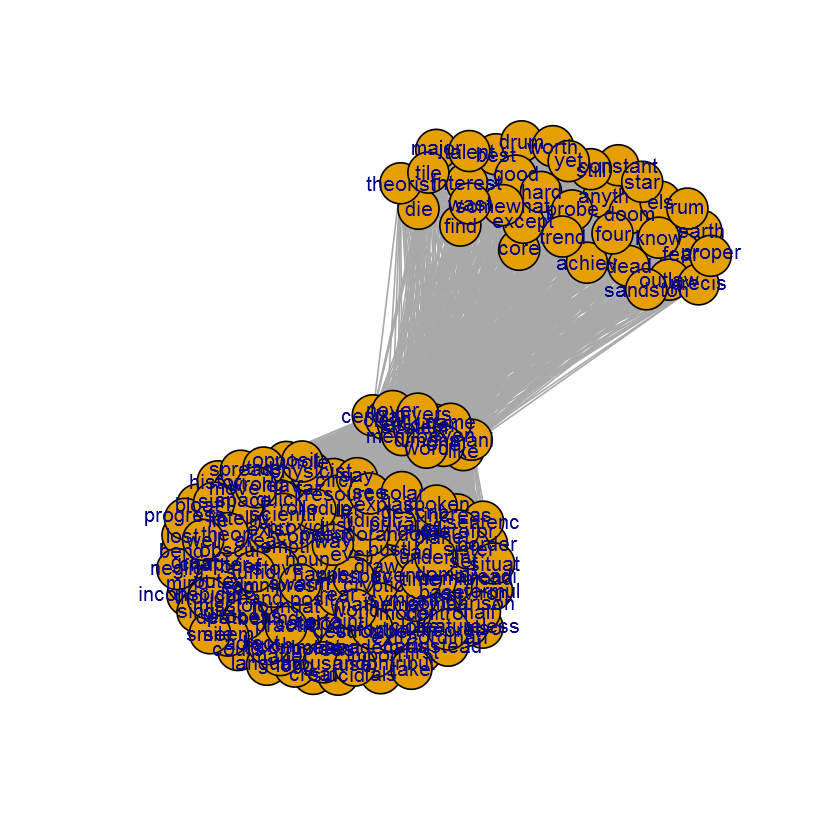

In [17]:
# set seed to make the layout reproducible
set.seed(3952)
layout1 <- layout.fruchterman.reingold(g)
plot(g, layout=layout1)